# Zadanie 1 

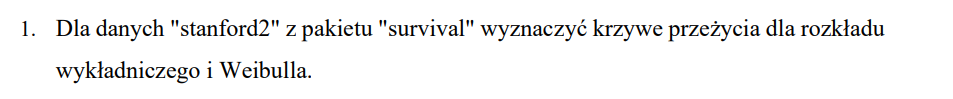

(Intercept)  Log(scale) 
  7.0927117   0.5900418

Call:
survreg(formula = Surv(stanford2$time, stanford2$status) ~ 1, 
    dist = "exp")

Coefficients:
(Intercept) 
   7.034251 

Scale fixed at 1 

Loglik(model)= -907.9   Loglik(intercept only)= -907.9
n= 184 

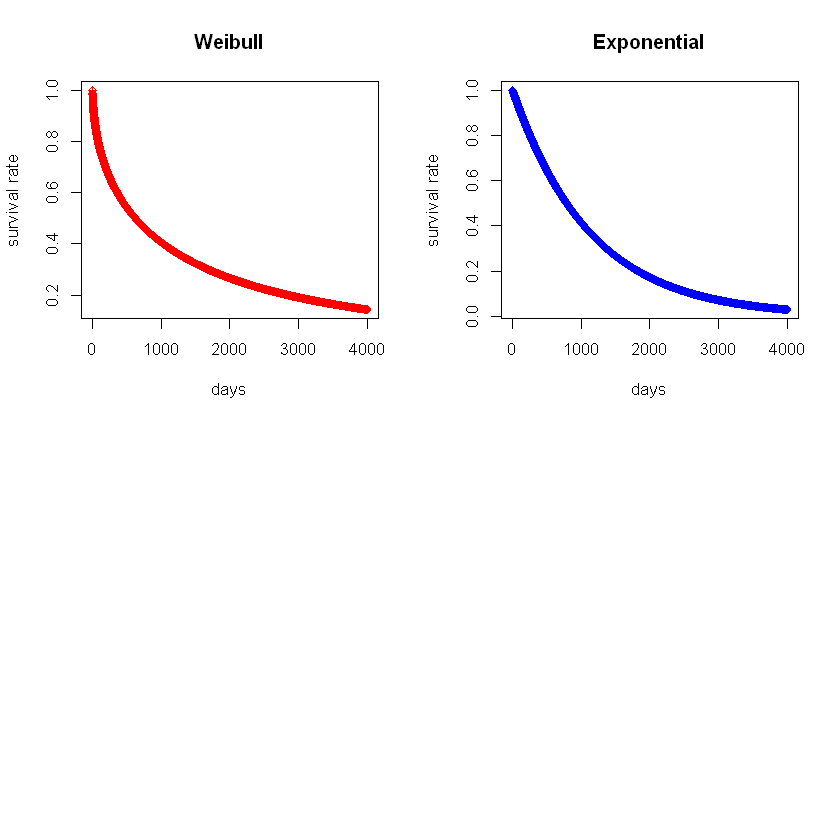

In [3]:
library(survival)
data(stanford2)

weibull <- survreg(Surv(stanford2$time,stanford2$status)~1,dist="weibull")
weibull$icoef
x1=seq(0,4000,length=10000)
y1=exp(−(exp((-1)*weibull$icoef[1])∗x1)^(1/1.804064))  # współczynniki wzięte z outputu funkcji survreg() z parametrem dist = 'weibull'

survreg(Surv(stanford2$time,stanford2$status)~1,dist="exp")
x2 <- x1
y2 <- exp(−exp(−7.034251)∗x2)  # współczynnik wzięty z outputu funckji survreg() z parametrem dist = "exp"

par(mfrow = c(2,2))
plot(x1,y1, col = 'red', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Weibull")
plot(x2, y2, col = 'blue', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Exponential")

# Zadanie 2

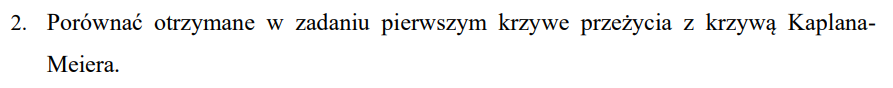

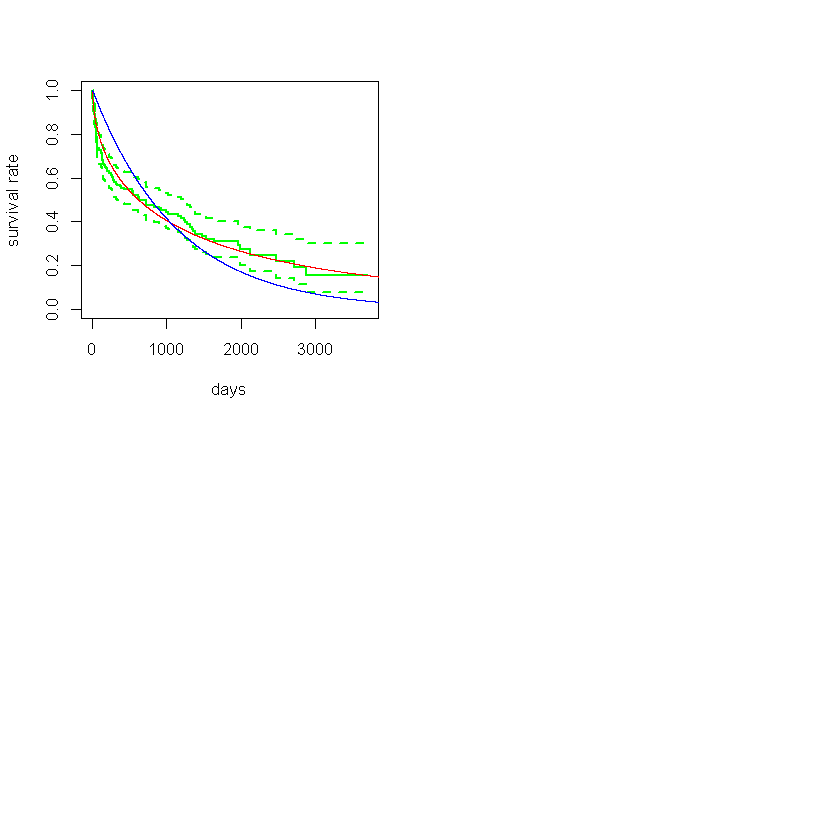

In [7]:
par(mfrow = c(2,2))
plot(survfit(Surv(stanford2$time, stanford2$status)~1), col = 'green', ylab = 'survival rate', xlab = 'days', lwd = 2) # Kaplan Meyer
#plot(x1,y1, col = 'red', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Weibull")
#plot(x2, y2, col = 'blue', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Exponential")
lines(x1,y1, col = 'red')   # weibull
lines(x2, y2, col = 'blue')  # exponential

# porównać mediany dla wszystkich krzywych
# porównać kształty tych krzywych

# Zadanie 3

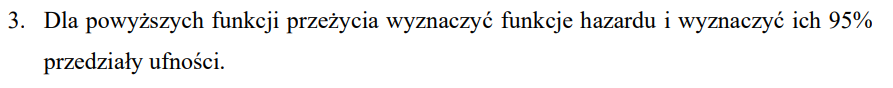

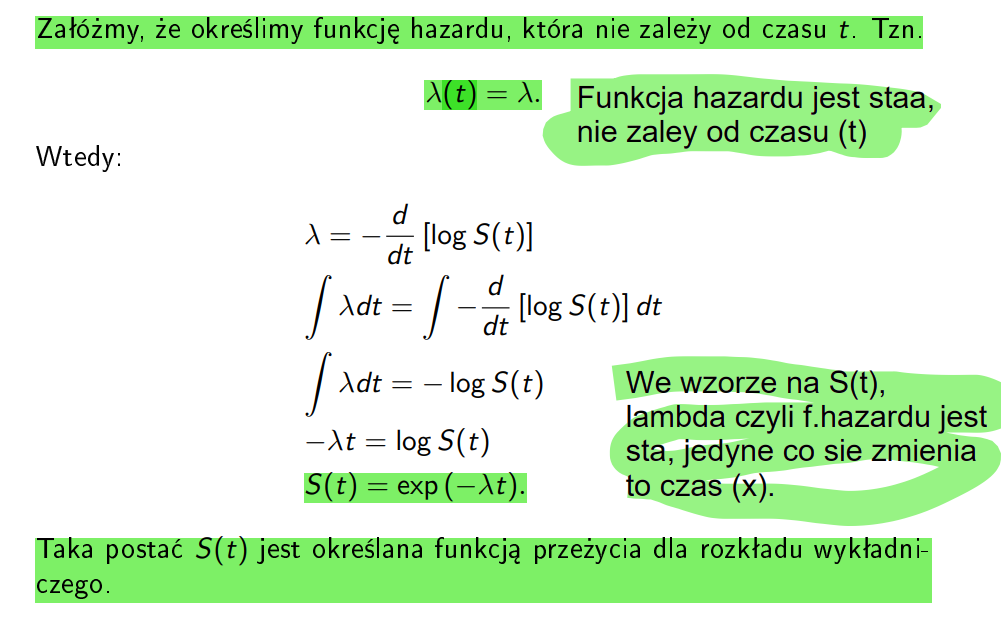

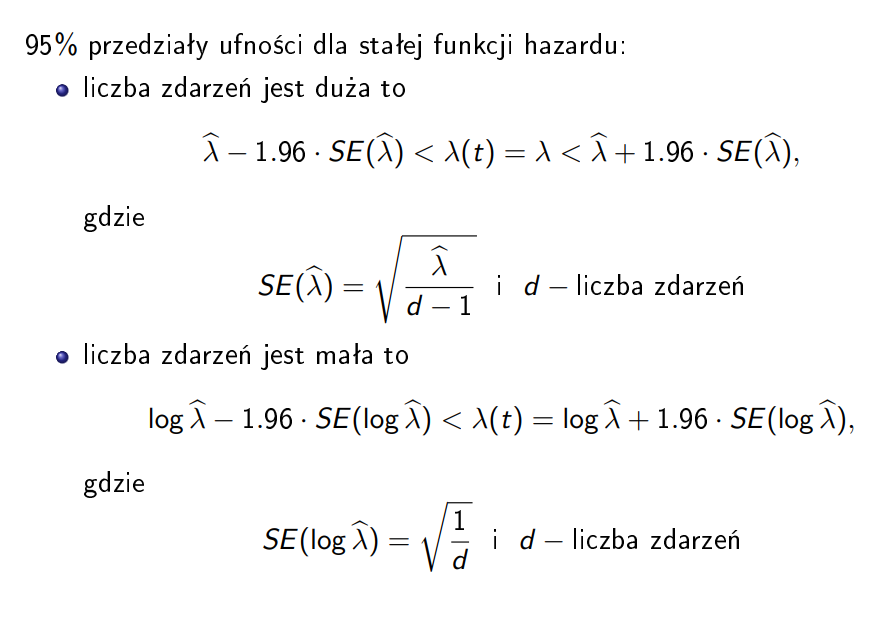

In [9]:
expo <-  survreg(Surv(stanford2$time, stanford2$status) ~ 1, dist = 'exponential')
lambda_expo <-  exp(-expo$coef)  # f hazradu dla krzywej z rozkładu wykładniczego

wei <-  survreg(Surv(stanford2$time, stanford2$status) ~ 1, dist = 'weibull')
lambda_wei <-  exp(-wei$icoef[1])  # f hazardu dla krzywej z rozkładu weibulla

kappa_wei <-  1/wei$icoef[2]   # stała Kappa z wykładu, która uzależnia f hazradu weibulla od czasu


d <- sum(stanford2$status)  # liczba zdarzeń
se_lambda_wei <-  sqrt(lambda_wei/(d-1))   # blad standardowy

# 95% przedzial ufnosci
Left_wei <-  lambda_wei - 1.96*se_lambda_wei
Left_wei[L_wei < 0] <-  0  # lewy koniec przedziału nie może być ujemny, jeśli jest ujemny to zamieniamy go na 0
Right_wei <-  lambda_wei + 1.96*se_lambda_wei

# Zadanie 4

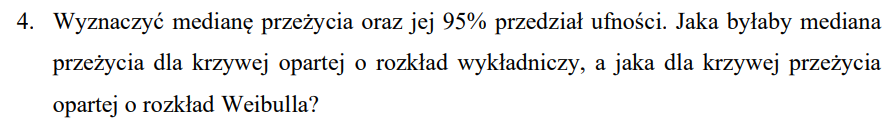

In [10]:
#--------------------------------------------------------------------------------------------------------------------
# skopiowany kod z zadania 1., ponieważ te zmienne są potrzebne i niewygodnie sie ich...
# ...szuka na początku notebooka

#survreg(Surv(stanford2$time,stanford2$status)~1,dist="weibull")
x1=seq(0,4000,length=10000)
y1=exp(−(exp(−7.092712)∗x1)^(1/1.804064))  # współczynniki wzięte z outputu funkcji survreg() z parametrem dist = 'weibull'

#survreg(Surv(stanford2$time,stanford2$status)~1,dist="exp")
x2 <- x1
y2 <- exp(−exp(−7.034251)∗x2)  # współczynnik wzięty z outputu funckji survreg() z parametrem dist = "exp"

#par(mfrow = c(2,2))
#plot(x1,y1, col = 'red', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Weibull")
#plot(x2, y2, col = 'blue', pch = 10, xlab = 'days', ylab = 'survival rate', main = "Exponential")
# -------------------------------------------------------------------------------------------------------------------------

# mediana czasu przeżycia
print('Mediana czasu przeżycia według danych oraz jej 95% przedział ufności')
survfit(Surv(stanford2$time,stanford2$status)~1) #mediana



#mediana dla wykładniczego
threshold <- 0.0001

for (i in 1:length(y2)){
    diff <- abs(y2[i] - 0.5)
    if(diff < threshold){
        x_median_expo_idx <- i       # jaki index x odpowiada y, który ma wartośc bardzo bliską 0.5
    }
}
median_expo <- x2[x_median_expo_idx] # który x odpowiada medianie 



#mediana dla Weibulla
threshold <- 0.0001

for (i in 1:length(y1)){
    diff <- abs(y1[i] - 0.5)
    if(diff < threshold){
        x_median_weibull_idx <- i       # jaki index x odpowiada y, który ma wartośc bardzo bliską 0.5
    }
}
median_weibull <- x1[x_median_weibull_idx]


print('Mediana czasu przeżycia według funckji przeżycia bazującej na rozkładzie wykładnicznym')
print(median_expo)

print('Mediana czasu przeżycia według funkcji przeżycia bazującej na rozkładzie Weibulla')
print(median_weibull)

[1] "Mediana czasu przezycia wedlug danych oraz jej 95% przedzial ufnosci"


Call: survfit(formula = Surv(stanford2$time, stanford2$status) ~ 1)

      n  events  median 0.95LCL 0.95UCL 
    184     113     631     328    1232 

[1] "Mediana czasu przezycia wedlug funckji przezycia bazujacej na rozkladzie wykladnicznym"
[1] 786.4786
[1] "Mediana czasu przezycia wedlug funkcji przezycia bazujacej na rozkladzie Weibulla"
[1] 621.2621


In [13]:
dist_expo <-  exp(-lambda_expo*x1)
dist_wei <-  exp(-(lambda_wei*x2)^kappa_wei)

In [16]:
k_expo <-  which.min(abs(dist_expo-0.5))
median_expo <-  x1[k_expo]

k_wei <-  which.min(abs(dist_wei-0.5))
median_wei <-  x2[k_wei]

median_expo
median_wei

[1] 786.4786

[1] 969.2969

# Zadanie 5

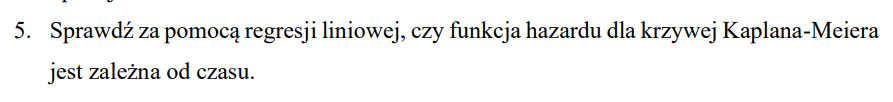

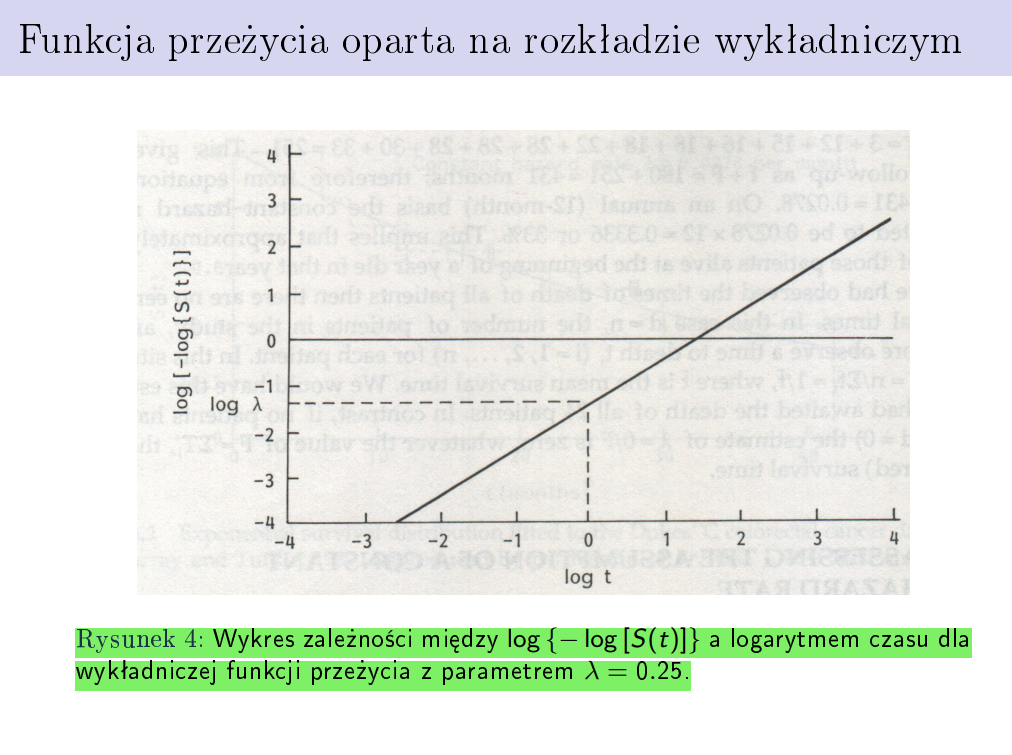

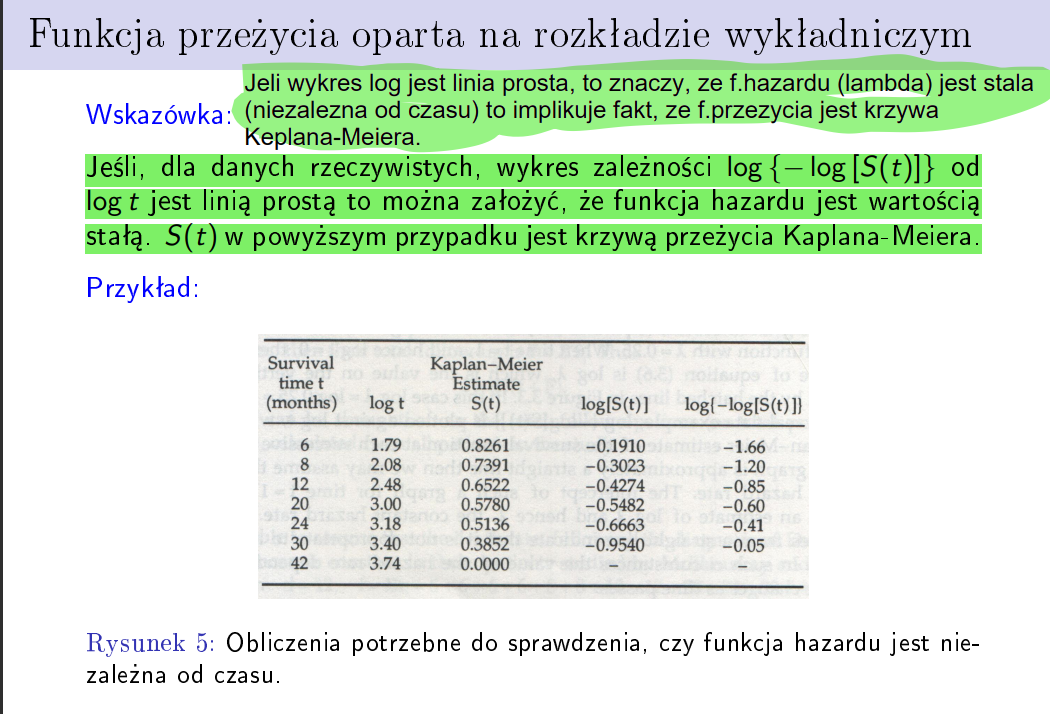


Call:
lm(formula = log_S_t ~ log_t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74422 -0.10835 -0.05383  0.15767  0.44289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.066747   0.051557  -78.88   <2e-16 ***
log_t        0.578879   0.008607   67.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1914 on 165 degrees of freedom
Multiple R-squared:  0.9648,	Adjusted R-squared:  0.9646 
F-statistic:  4523 on 1 and 165 DF,  p-value: < 2.2e-16


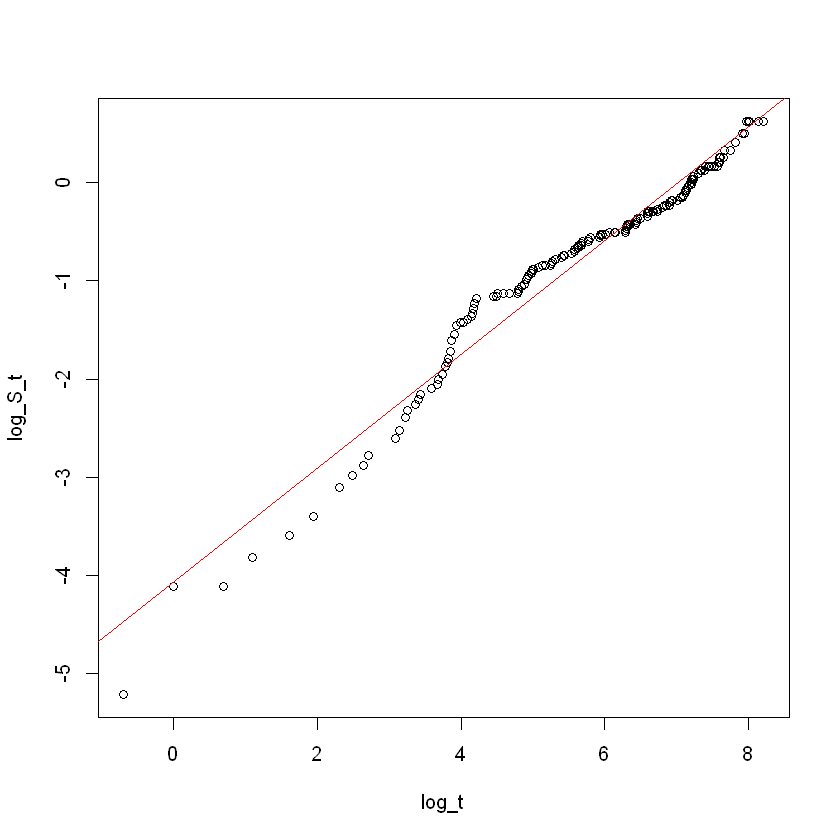

In [6]:
KM_estimate <- survfit(Surv(stanford2$time,stanford2$status)~1)
time <- KM_estimate$time
log_t <- log(time)
S_t <- KM_estimate$surv
log_S_t <- log(-log(S_t))
lin_reg <- lm(log_S_t~log_t)
summary(lin_reg)
plot(log_t, log_S_t)
abline(lin_reg, col="red") #jest prosta - wiec mozemy zalozyc ze f. hazardu jest stala

Jak widać po wysokiem R2 oraz po wykresie, funkcja jest liniowa, czyli zakładamy, że funkcja hazardu jest stała w czasie.

# Zadanie 6

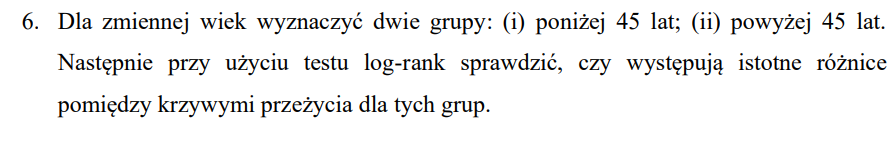

In [48]:
age_binary <- rep('X', nrow(stanford2))
stanford2$age_binary <- age_binary

for(i in 1:nrow(stanford2)){
    if(stanford2$age[i] <= 45){
        stanford2$age_binary[i] <- 0   # 0 --> poniżej 45 lat (lub równo 45 lat)
    }
    else{
        stanford2$age_binary[i] <- 1   # 1 --> powyżej 45 lat
    }
}

head(stanford2)
survdiff(Surv(stanford2$time,stanford2$status)~stanford2$age_binary)  # log rank test

,id,time,status,age,t5,age_binary
139,139,86,1,12,1.26,0
159,159,10,1,13,1.49,0
181,181,60,0,13,NA,0
119,119,1116,0,14,0.54,0
74,74,2006,0,15,1.26,0
120,120,1107,0,18,0.25,0


Call:
survdiff(formula = Surv(stanford2$time, stanford2$status) ~ stanford2$age_binary)

                         N Observed Expected (O-E)^2/E (O-E)^2/V
stanford2$age_binary=0 102       53     65.4      2.36      5.66
stanford2$age_binary=1  82       60     47.6      3.24      5.66

 Chisq= 5.7  on 1 degrees of freedom, p= 0.02 

Występują istotne różnice w krzywych przeżycia dla grupy wiekowej poniżej 45 lat oraz powyżej 45 lat (p-value = 0.02).